# Q2

In [11]:
import cv2 # just for reading the image
import numpy as np
import matplotlib.pyplot as plt

read image "q2.png"

In [12]:
img = cv2.imread("/content/q2.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB since OpenCV loads images in BGR format

plot the image

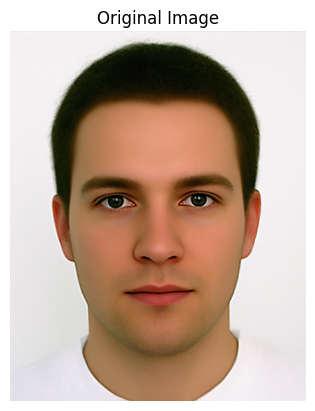

In [13]:
def plot_image(image, title):
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()

plot_image(img, "Original Image")

In [14]:
def segment(image, seed_point, threshold, neighbor_mode=0):
    segmented_image = image.copy()
    h, w = image.shape[:2]
    seed_value = image[seed_point[1], seed_point[0]].astype(int)

    # Initialize segmented area
    segmented_area = np.zeros((h, w), np.bool_)
    segmented_area[seed_point[1], seed_point[0]] = True

    # Initialize list of points to be processed
    points_to_process = [seed_point]

    while points_to_process:
        current_point = points_to_process.pop(0)
        x, y = current_point

        # Define neighbors based on connectivity mode
        if neighbor_mode == 0:  # 4-connectivity
            neighbors = [(x, y-1), (x, y+1), (x-1, y), (x+1, y)]
        elif neighbor_mode == 1:  # 8-connectivity
            neighbors = [(x, y-1), (x, y+1), (x-1, y), (x+1, y),
                         (x-1, y-1), (x-1, y+1), (x+1, y-1), (x+1, y+1)]

        for nx, ny in neighbors:
            if 0 <= nx < w and 0 <= ny < h and not segmented_area[ny, nx]:
                neighbor_value = image[ny, nx].astype(int)
                if np.all(np.abs(neighbor_value - seed_value) <= threshold):
                    segmented_area[ny, nx] = True
                    points_to_process.append((nx, ny))

    # Change the color of the segmented region
    segmented_image[segmented_area] = [255, 0, 0]  # Change color to red

    return segmented_image

In [46]:
seed_point= (100, 100)
threshold= 30
threshold1= 50

In [47]:
segmented_image_4 = segment(img, seed_point, threshold, neighbor_mode=0)
segmented_image_8 = segment(img, seed_point, threshold, neighbor_mode=1)


segmented_image_4_1 = segment(img, seed_point, threshold1, neighbor_mode=0)
segmented_image_8_1 = segment(img, seed_point, threshold1, neighbor_mode=1)

plot the results and compare them

treshold 30


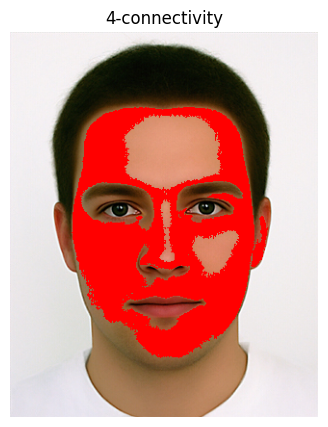

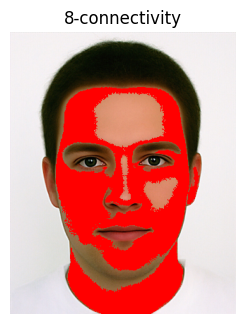

In [48]:
plt.figure(figsize=(10, 5))
print("treshold 30")
plt.subplot(1, 2, 1)
plot_image(segmented_image_4, '4-connectivity')

plt.subplot(1, 2, 2)
plot_image(segmented_image_8, '8-connectivity')

treshold 50


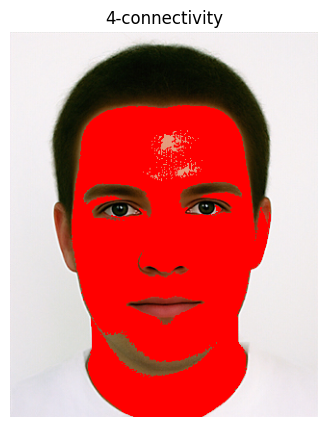

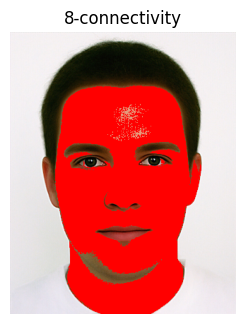

In [50]:
plt.figure(figsize=(10, 5))
print("treshold 50")
plt.subplot(1, 2, 1)
plot_image(segmented_image_4_1, '4-connectivity')

plt.subplot(1, 2, 2)
plot_image(segmented_image_8_1, '8-connectivity')